In [1]:
# ! pip install statsmodels
# ! pip install seaborn
# ! pip install scikit_posthocs

In [2]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import scikit_posthocs as sp
from scipy.stats import f_oneway

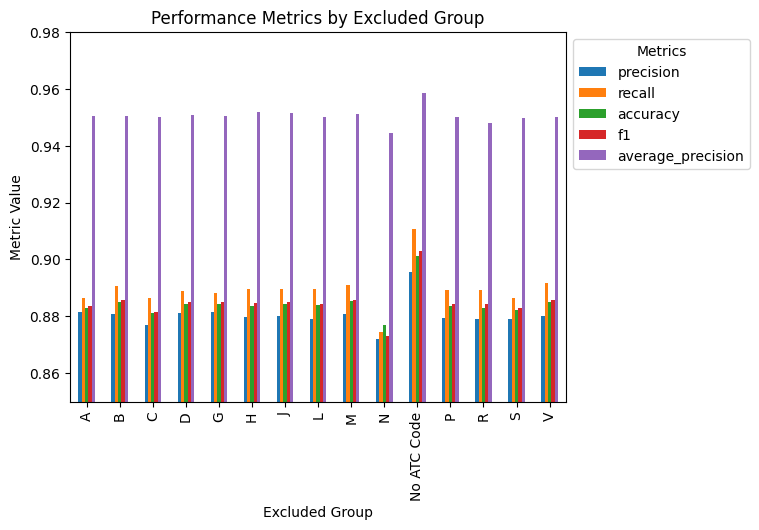

In [42]:
data = pd.read_csv("openpredict_drug_targets_scores_2024-07-03.csv")

numeric_data = data.drop(columns=['method', 'excluded group', 'fold'])

numeric_data_agg = numeric_data.groupby('excluded group atc').mean()

ax = numeric_data_agg[['precision', 'recall', 'accuracy', 'f1', 'average_precision']].plot(kind='bar')
ax.set_ylim(0.85, 0.98)
ax.legend(title="Metrics", loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Performance Metrics by Excluded Group')
plt.ylabel('Metric Value')
plt.xlabel('Excluded Group')
plt.savefig('performance_metrics_by_excluded_group.png',bbox_inches='tight')
plt.show()

In [22]:
numeric_data_agg_fixed = numeric_data_agg.reset_index()
numeric_data_agg_fixed = numeric_data_agg_fixed.rename(columns={'excluded group atc': 'excluded_group_atc'})
display(numeric_data_agg_fixed)

,excluded_group_atc,precision,recall,accuracy,f1,average_precision
0,A,0.881391,0.886327,0.883033,0.883784,0.950383
1,B,0.880747,0.890820,0.884868,0.885731,0.950612
2,C,0.876998,0.886333,0.881291,0.881609,0.950064
3,D,0.881253,0.889042,0.884378,0.885117,0.950905
4,G,0.881602,0.888242,0.884174,0.884895,0.950301
5,H,0.879590,0.889718,0.883594,0.884599,0.951824
6,J,0.880191,0.889726,0.884317,0.884932,0.951657
7,L,0.879076,0.889488,0.883916,0.884243,0.950064
8,M,0.880768,0.890888,0.885246,0.885745,0.951241
9,N,0.872173,0.874325,0.876815,0.873196,0.944536


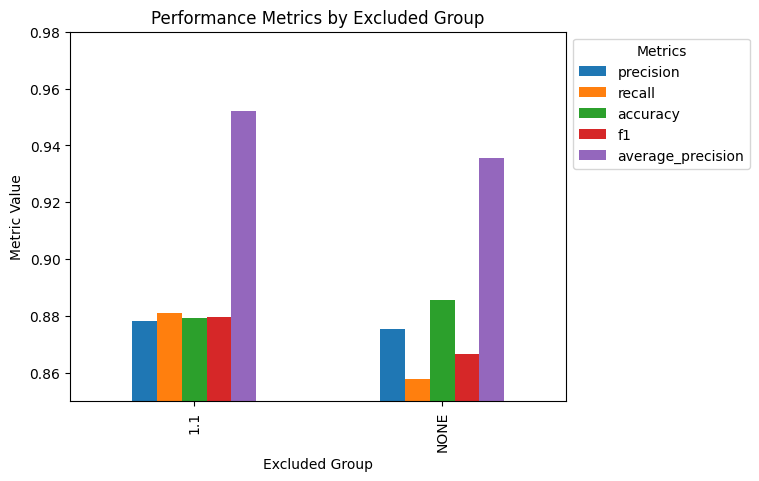

In [3]:
data = pd.read_csv("../tests/openpredict_drug_targets_scores_2024-07-08.csv")

numeric_data = data.drop(columns=['method', 'excluded group', 'fold'])

numeric_data_agg = numeric_data.groupby('excluded group ec').mean()

ax = numeric_data_agg[['precision', 'recall', 'accuracy', 'f1', 'average_precision']].plot(kind='bar')
ax.set_ylim(0.85, 0.98)
ax.legend(title="Metrics", loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Performance Metrics by Excluded Group')
plt.ylabel('Metric Value')
plt.xlabel('Excluded Group')
plt.savefig('performance_metrics_by_excluded_group.png',bbox_inches='tight')
plt.show()